In [8]:
import plotly.express as px
import pandas as pd
import json
import numpy as np

# loading the data
df = pd.read_csv(
    "/Users/velo1/SynologyDrive/GIT_syno/Mac/Netology/NLP/LLM_resp_times_2.csv"
)

# Plotting the data
fig = px.line(
    df,
    x="completion_tokens",
    y="total_response_time",
    color="prompt_tokens",
    title="Response Time vs Prompt Tokens",
)

# Showing the figure
fig.show()

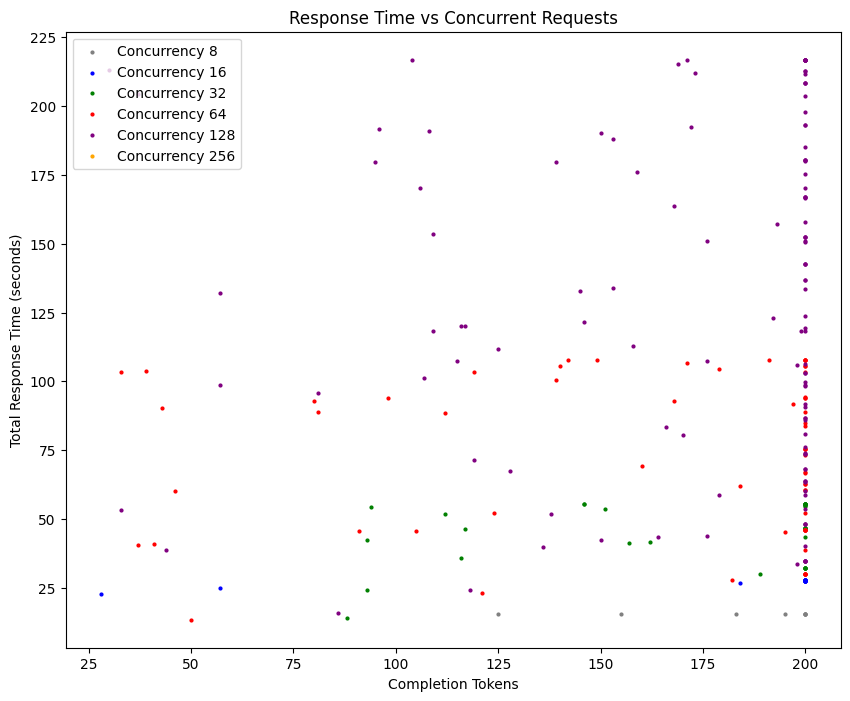

In [49]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# loading the data
df = pd.read_csv(
    "/Users/velo1/SynologyDrive/GIT_syno/Mac/Netology/NLP/LLM_batching_3090.csv"
)
color_map = {
    8: "grey",
    16: "blue",
    32: "green",
    64: "red",
    128: "purple",
    256: "orange",
    # 512: "purple",
    # 1024: "brown",
    # 2048: "pink",
    # 4096: "grey"
}

# Plotting the data
fig = px.scatter(
    df,
    x="completion_tokens",
    y="total_response_time",
    color="concurency",  # Make sure this column contains values like 8, 16, 32, etc.
    title="Response Time vs Concurrent requests",
    height=800,
    color_continuous_scale= "Plasma"
)

fig.show()



# Assuming 'df' is your DataFrame and it has 'completion_tokens', 'total_response_time', and 'concurrency' columns
# Replace 'concurrency' with the actual column name in your DataFrame that has these values

# Create a scatter plot
plt.figure(figsize=(10, 8))
for concurrency in color_map:
    # Select data for each concurrency level
    subset = df[df['concurency'] == concurrency]
    
    # Scatter plot for each concurrency level
    plt.scatter(subset['completion_tokens'], subset['total_response_time'], 
                color=color_map[concurrency], label=f'Concurrency {concurrency}', 
                marker='o', s=4)

# Add titles and labels
plt.title('Response Time vs Concurrent Requests')
plt.xlabel('Completion Tokens')
plt.ylabel('Total Response Time (seconds)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [50]:
df.head()
df['performance'] = df['completion_tokens'] / df['total_response_time']
df['overall_performance'] = df['performance'] * df['concurency']

group =df.groupby('concurency')['overall_performance'].aggregate(np.mean).reset_index()

group




,concurency,overall_performance
0,8,93.218068
1,16,104.358234
2,32,129.493546
3,64,175.578363
4,128,238.951352


In [45]:
df.head()

,concurency,context_length,max_tokens,total_response_time,completion_tokens,prompt_tokens,performance
0,8,5000,200,14.339156,200,4062,13.947822
1,8,5000,200,14.328560,138,4062,9.631114
2,8,5000,200,14.334418,200,4062,13.952432
3,8,5000,200,14.333370,200,4062,13.953452
4,8,5000,200,9.453566,24,4062,2.538725
